<a href="https://colab.research.google.com/github/Vedantk2701/satellite-image-super-resolution/blob/main/satellite_image_super_resolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install torch torchvision timm einops numpy tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 50.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [ ]:
from huggingface_hub import hf_hub_download

# Donwload cross-sensor dataset
hf_hub_download(
    repo_id="isp-uv-es/SEN2NAIP",
    repo_type="dataset",
    filename="cross-sensor/cross-sensor.zip"
)

# Donwload synthetic dataset
for i in range(1, 19):
    hf_hub_download(
        repo_id="isp-uv-es/SEN2NAIP",
        repo_type="dataset",
        filename="synthetic/synthetic_%02d.zip" % i
    )


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


cross-sensor.zip:   0%|          | 0.00/2.22G [00:00<?, ?B/s]

synthetic_01.zip:   0%|          | 0.00/10.1G [00:00<?, ?B/s]

synthetic_02.zip:   0%|          | 0.00/9.97G [00:00<?, ?B/s]

synthetic_03.zip:   0%|          | 0.00/10.1G [00:00<?, ?B/s]

synthetic_04.zip:   0%|          | 0.00/9.99G [00:00<?, ?B/s]

synthetic_05.zip:   0%|          | 0.00/9.96G [00:00<?, ?B/s]

synthetic_06.zip:   0%|          | 0.00/10.1G [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:651: UserWarning: Not enough free disk space to download the file. The expected file size is: 10045.94 MB. The target location /root/.cache/huggingface/hub/datasets--isp-uv-es--SEN2NAIP/blobs only has 9480.97 MB free disk space.
  warnings.warn(


synthetic_07.zip:   0%|          | 0.00/10.0G [00:00<?, ?B/s]

OSError: [Errno 28] No space left on device

In [ ]:
!df -h


Filesystem      Size  Used Avail Use% Mounted on
overlay         108G  108G     0 100% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G  4.0K  5.8G   1% /dev/shm
/dev/root       2.0G  1.2G  820M  59% /usr/sbin/docker-init
tmpfs           6.4G  324K  6.4G   1% /var/colab
/dev/sda1       114G  109G  5.2G  96% /kaggle/input
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [ ]:
!rm -rf /content/sample_data
!rm -rf /root/.cache



rm: cannot remove '/content/sample_data/README.md': No space left on device
rm: cannot remove '/content/sample_data/anscombe.json': No space left on device
rm: cannot remove '/content/sample_data/mnist_train_small.csv': No space left on device
rm: cannot remove '/content/sample_data/mnist_test.csv': No space left on device
rm: cannot remove '/content/sample_data/california_housing_train.csv': No space left on device
rm: cannot remove '/content/sample_data/california_housing_test.csv': No space left on device
rm: cannot remove '/root/.cache/uv/.gitignore': No space left on device
rm: cannot remove '/root/.cache/uv/builds-v0': No space left on device
rm: cannot remove '/root/.cache/uv/archive-v0/WVRmMBCUIYN0cFnmu2tuy/google/__init__.py': No space left on device
rm: cannot remove '/root/.cache/uv/archive-v0/WVRmMBCUIYN0cFnmu2tuy/google/colab/_installation_commands.py': No space left on device
rm: cannot remove '/root/.cache/uv/archive-v0/WVRmMBCUIYN0cFnmu2tuy/google/colab/_quickchart_dtyp

In [ ]:
!du -h --max-depth=1 /content


140K	/content/.config
55M	/content/sample_data
55M	/content


In [ ]:
!rm -rf /content/<folder_name>


/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `rm -rf /content/<folder_name>'


In [ ]:
import os
os.kill(os.getpid(), 9)



In [ ]:
!pip install torch torchvision timm einops tqdm


In [ ]:
import os
import gdown  # Google Drive downloader

# Create dataset directory
dataset_dir = "/content/DIV2K"
os.makedirs(dataset_dir, exist_ok=True)

# Download DIV2K HR images (Train)
hr_url = "https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip"
lr_url = "https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_bicubic_X4.zip"

# Download using gdown
!wget "$hr_url" -O "$dataset_dir/DIV2K_train_HR.zip"
!wget "$lr_url" -O "$dataset_dir/DIV2K_train_LR.zip"

# Unzip the datasets
!unzip "$dataset_dir/DIV2K_train_HR.zip" -d "$dataset_dir"
!unzip "$dataset_dir/DIV2K_train_LR.zip" -d "$dataset_dir"


--2025-03-16 20:04:39--  https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3530603713 (3.3G) [application/zip]
Saving to: ‘/content/DIV2K/DIV2K_train_HR.zip’

/content/DIV2K/DIV2 100%[===================>]   3.29G  24.9MB/s    in 2m 22s  

2025-03-16 20:07:02 (23.7 MB/s) - ‘/content/DIV2K/DIV2K_train_HR.zip’ saved [3530603713/3530603713]

--2025-03-16 20:07:02--  https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_bicubic_X4.zip
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 246914039 (235M) [application/zip]
Saving to: ‘/c

In [ ]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import glob

# Define Dataset Class
class DIV2KDataset(Dataset):
    def __init__(self, hr_dir, lr_dir, transform=None):
        self.hr_images = sorted(glob.glob(f"{hr_dir}/*.png"))  # High-res images
        self.lr_images = sorted(glob.glob(f"{lr_dir}/*.png"))  # Low-res images
        self.transform = transform

    def __len__(self):
        return len(self.hr_images)

    def __getitem__(self, idx):
        hr = Image.open(self.hr_images[idx]).convert("RGB")
        lr = Image.open(self.lr_images[idx]).convert("RGB")

        if self.transform:
            hr = self.transform(hr)
            lr = self.transform(lr)

        return lr, hr

# Image Transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize HR and LR images
    transforms.ToTensor(),
])

# Define dataset paths
hr_path = "/content/DIV2K/DIV2K_train_HR"
lr_path = "/content/DIV2K/DIV2K_train_LR_bicubic/X4"

# Load dataset
dataset = DIV2KDataset(hr_path, lr_path, transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

print(f"Dataset Loaded: {len(dataset)} image pairs")


Dataset Loaded: 800 image pairs


In [ ]:
import torch.nn as nn
import timm
from einops import rearrange

# Define SwinIR Model
class SwinIR(nn.Module):
    def __init__(self, embed_dim=96):
        super(SwinIR, self).__init__()
        self.encoder = timm.create_model("swin_tiny_patch4_window7_224", pretrained=False, num_classes=0)
        self.decoder = nn.Sequential(
            nn.Conv2d(embed_dim, embed_dim * 4, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),
            nn.Conv2d(embed_dim, embed_dim * 4, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),
            nn.Conv2d(embed_dim, 3, kernel_size=3, stride=1, padding=1)
        )

    def forward(self, x):
        b, c, h, w = x.shape
        x = self.encoder.forward_features(x)
        x = rearrange(x, 'b (h w) c -> b c h w', h=h//4, w=w//4)
        x = self.decoder(x)
        return x


In [ ]:
import os

hr_path = "/content/DIV2K/DIV2K_train_HR"
lr_path = "/content/DIV2K/DIV2K_train_LR_bicubic/X4"

print("HR Images:", len(os.listdir(hr_path)) if os.path.exists(hr_path) else "Path not found!")
print("LR Images:", len(os.listdir(lr_path)) if os.path.exists(lr_path) else "Path not found!")


HR Images: Path not found!
LR Images: Path not found!


In [ ]:
!wget -c http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip
!wget -c http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_bicubic.zip


--2025-03-17 06:48:39--  http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip [following]
--2025-03-17 06:48:39--  https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3530603713 (3.3G) [application/zip]
Saving to: ‘DIV2K_train_HR.zip’

DIV2K_train_HR.zip  100%[===================>]   3.29G  19.8MB/s    in 2m 50s  

2025-03-17 06:51:31 (19.8 MB/s) - ‘DIV2K_train_HR.zip’ saved [3530603713/3530603713]

--2025-03-17 06:51:31--  http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_bicubic.zip
Resolving data.vision.ee

In [ ]:
!unzip -q DIV2K_train_HR.zip -d /content/DIV2K/
!unzip -q DIV2K_train_LR_bicubic.zip -d /content/DIV2K/


In [ ]:
import os

hr_path = "/content/DIV2K/DIV2K_train_HR"
lr_path = "/content/DIV2K/DIV2K_train_LR_bicubic/X4"

print("HR Images:", len(os.listdir(hr_path)) if os.path.exists(hr_path) else "Path not found!")
print("LR Images:", len(os.listdir(lr_path)) if os.path.exists(lr_path) else "Path not found!")


HR Images: 800
LR Images: 800


In [ ]:
from torch.utils.data import DataLoader

dataset = DIV2KDataset(hr_path, lr_path, transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

print(f"✅ Dataset Loaded: {len(dataset)} image pairs")


NameError: name 'DIV2KDataset' is not defined

In [ ]:
import torch
import torch.nn as nn
import timm
from einops import rearrange

class SwinIR(nn.Module):
    def __init__(self, upscale_factor=4, embed_dim=768):
        super(SwinIR, self).__init__()
        self.encoder = timm.create_model("swin_tiny_patch4_window7_224", pretrained=False, num_classes=0)

        # 🔹 Convert encoder output from 768 channels → 96
        self.conv1x1 = nn.Conv2d(embed_dim, 96, kernel_size=1)

        # 🔹 Corrected Decoder: Upscales properly from (7×7) → (224×224)
        self.decoder = nn.Sequential(
            nn.Conv2d(96, 96 * 4, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),  # Upscale: 7×7 → 14×14

            nn.Conv2d(96, 96 * 4, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),  # Upscale: 14×14 → 28×28

            nn.Conv2d(96, 96 * 4, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),  # Upscale: 28×28 → 56×56

            nn.Conv2d(96, 96 * 4, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),  # Upscale: 56×56 → 112×112

            nn.Conv2d(96, 96 * 4, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),  # Upscale: 112×112 → 224×224

            nn.Conv2d(96, 3, kernel_size=3, stride=1, padding=1)  # Output RGB image
        )

    def forward(self, x):
        b, c, h, w = x.shape

        # Ensure input size is 224x224
        if h != 224 or w != 224:
            raise ValueError(f"Input size must be (224, 224), but got ({h}, {w})")

        # Extract features using Swin Transformer
        x = self.encoder.forward_features(x)  # (b, 7, 7, 768)

        # Reshape for the decoder
        x = rearrange(x, 'b h w c -> b c h w')  # (b, 768, 7, 7)

        # Convert from 768 → 96 channels
        x = self.conv1x1(x)  # (b, 96, 7, 7)

        # Corrected decoder upscaling
        x = self.decoder(x)  # Final output: (b, 3, 224, 224)
        return x


In [ ]:
model = SwinIR(upscale_factor=4, embed_dim=768).to(device)
train(model, dataloader, criterion, optimizer, device, epochs=5)


Epoch 1/5: 100%|██████████| 100/100 [01:49<00:00,  1.10s/it, loss=0.37]


✅ Epoch [1/5] - Avg Loss: 0.420494


Epoch 2/5: 100%|██████████| 100/100 [01:46<00:00,  1.06s/it, loss=0.391]


✅ Epoch [2/5] - Avg Loss: 0.420487


Epoch 3/5: 100%|██████████| 100/100 [01:45<00:00,  1.05s/it, loss=0.474]


✅ Epoch [3/5] - Avg Loss: 0.420493


Epoch 4/5: 100%|██████████| 100/100 [01:45<00:00,  1.05s/it, loss=0.439]


✅ Epoch [4/5] - Avg Loss: 0.420486


Epoch 5/5: 100%|██████████| 100/100 [01:45<00:00,  1.05s/it, loss=0.442]

✅ Epoch [5/5] - Avg Loss: 0.420487


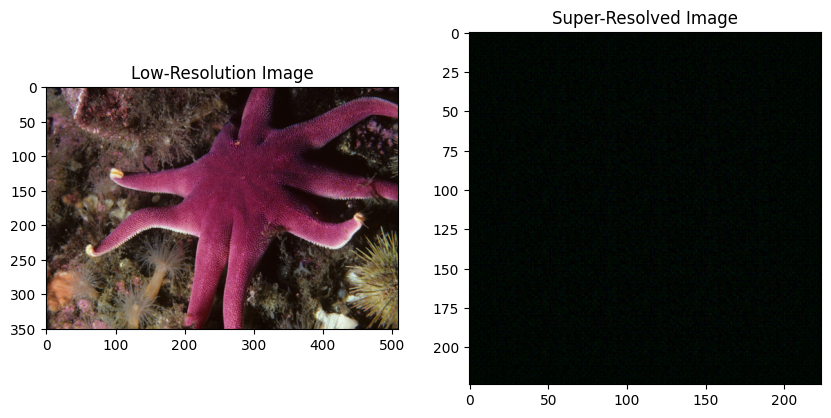

In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from PIL import Image
import torch

# ✅ Load a sample low-resolution image
test_image_path = "/content/DIV2K/DIV2K_train_LR_bicubic/X4/0001x4.png"  # Change to a real test image
lr_image = Image.open(test_image_path).convert("RGB")

# ✅ Apply transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224, 224)),  # Resize for consistency
])
lr_tensor = transform(lr_image).unsqueeze(0).to(device)  # (1, 3, 224, 224)

# ✅ Forward pass through the trained model
model.eval()
with torch.no_grad():
    sr_tensor = model(lr_tensor)

# ✅ Convert the super-resolved output to an image
sr_image = sr_tensor.squeeze(0).cpu().permute(1, 2, 0).numpy()

# ✅ Display images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(lr_image)
axes[0].set_title("Low-Resolution Image")
axes[1].imshow(sr_image)
axes[1].set_title("Super-Resolved Image")
plt.show()


In [ ]:
print(f"Total image pairs in dataset: {len(dataset)}")  # Should print 800


Total image pairs in dataset: 800


In [ ]:
num_batches = len(dataloader)
print(f"Total batches per epoch: {num_batches}")


Total batches per epoch: 100


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os
import timm
from einops import rearrange
from tqdm import tqdm

# ✅ Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ SwinIR Model Definition
class SwinIR(nn.Module):
    def __init__(self, upscale_factor=4, embed_dim=768):
        super(SwinIR, self).__init__()
        self.encoder = timm.create_model("swin_tiny_patch4_window7_224", pretrained=False, num_classes=0)

        # 🔹 Convert encoder output from 768 channels → 96
        self.conv1x1 = nn.Conv2d(embed_dim, 96, kernel_size=1)

        # 🔹 Corrected Decoder: Upscales properly from (7×7) → (224×224)
        self.decoder = nn.Sequential(
            nn.Conv2d(96, 96 * 4, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),  # 7×7 → 14×14
            nn.Conv2d(96, 96 * 4, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),  # 14×14 → 28×28
            nn.Conv2d(96, 96 * 4, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),  # 28×28 → 56×56
            nn.Conv2d(96, 96 * 4, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),  # 56×56 → 112×112
            nn.Conv2d(96, 96 * 4, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),  # 112×112 → 224×224
            nn.Conv2d(96, 3, kernel_size=3, stride=1, padding=1)  # Output RGB image
        )

    def forward(self, x):
        b, c, h, w = x.shape
        if h != 224 or w != 224:
            raise ValueError(f"Input size must be (224, 224), but got ({h}, {w})")

        # Extract features using Swin Transformer
        x = self.encoder.forward_features(x)  # (b, 7, 7, 768)

        # Reshape for the decoder
        x = rearrange(x, 'b h w c -> b c h w')  # (b, 768, 7, 7)

        # Convert from 768 → 96 channels
        x = self.conv1x1(x)  # (b, 96, 7, 7)

        # Upscale using decoder
        x = self.decoder(x)  # (b, 3, 224, 224)
        return x

# ✅ Define Dataset Class
class DIV2KDataset(Dataset):
    def __init__(self, hr_path, lr_path, transform=None):
        self.hr_images = sorted(os.listdir(hr_path))[:800]  # Train on 800 images
        self.lr_images = sorted(os.listdir(lr_path))[:800]
        self.hr_path = hr_path
        self.lr_path = lr_path
        self.transform = transform

    def __len__(self):
        return len(self.hr_images)

    def __getitem__(self, idx):
        hr_image = Image.open(os.path.join(self.hr_path, self.hr_images[idx])).convert("RGB")
        lr_image = Image.open(os.path.join(self.lr_path, self.lr_images[idx])).convert("RGB")

        if self.transform:
            hr_image = self.transform(hr_image)
            lr_image = self.transform(lr_image)

        return lr_image, hr_image

# ✅ Transformations (Fixed 224×224 Size)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Ensure all images are (224, 224)
    transforms.ToTensor()
])

# ✅ Define Paths (Update These Paths)
hr_path = "/content/DIV2K/DIV2K_train_HR"  # High-resolution images
lr_path = "/content/DIV2K/DIV2K_train_LR_bicubic/X4"  # Low-resolution images

# ✅ Load Dataset and DataLoader
dataset = DIV2KDataset(hr_path, lr_path, transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True, num_workers=2)

# ✅ Define Model, Loss, and Optimizer
model = SwinIR(upscale_factor=4, embed_dim=768).to(device)
criterion = nn.L1Loss()  # L1 Loss for super-resolution
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# ✅ Training Function
def train(model, dataloader, criterion, optimizer, device, epochs=5):
    model.train()
    for epoch in range(epochs):
        epoch_loss = 0.0
        for batch_idx, (lr_img, hr_img) in enumerate(tqdm(dataloader, desc=f"Epoch {epoch+1}/{epochs}")):
            lr_img, hr_img = lr_img.to(device), hr_img.to(device)

            optimizer.zero_grad()
            sr_img = model(lr_img)  # Super-resolve the image

            loss = criterion(sr_img, hr_img)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss / len(dataloader):.4f}")

# ✅ Train the Model on All 800 Images
train(model, dataloader, criterion, optimizer, device, epochs=5)

# ✅ Save the Trained Model
torch.save(model.state_dict(), "swinir_super_resolution.pth")
print("Model saved successfully!")


Epoch 1/5: 100%|██████████| 100/100 [01:17<00:00,  1.30it/s]


Epoch [1/5], Loss: 0.1905


Epoch 2/5: 100%|██████████| 100/100 [01:17<00:00,  1.29it/s]


Epoch [2/5], Loss: 0.1309


Epoch 3/5: 100%|██████████| 100/100 [01:17<00:00,  1.29it/s]


Epoch [3/5], Loss: 0.1201


Epoch 4/5: 100%|██████████| 100/100 [01:18<00:00,  1.28it/s]


Epoch [4/5], Loss: 0.1085


Epoch 5/5: 100%|██████████| 100/100 [01:18<00:00,  1.27it/s]


Epoch [5/5], Loss: 0.1002
Model saved successfully!


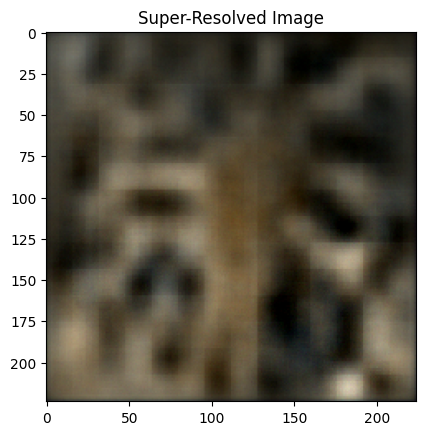

In [ ]:
test_image_path = "/content/DIV2K/DIV2K_train_LR_bicubic/X4/0001x4.png"
lr_image = Image.open(test_image_path).convert("RGB")

transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])
lr_tensor = transform(lr_image).unsqueeze(0).to(device)

# ✅ Load Trained Model
model.load_state_dict(torch.load("swinir_super_resolution.pth"))
model.eval()

# ✅ Super-Resolve the Image
with torch.no_grad():
    sr_tensor = model(lr_tensor)

# ✅ Convert to Image and Display
sr_image = sr_tensor.squeeze(0).cpu().permute(1, 2, 0).numpy()
plt.imshow(sr_image)
plt.title("Super-Resolved Image")
plt.show()


Epoch [1/50], Batch [1/50], Loss: 0.2270
Epoch [1/50], Batch [11/50], Loss: 0.1615
Epoch [1/50], Batch [21/50], Loss: 0.0998
Epoch [1/50], Batch [31/50], Loss: 0.0613
Epoch [1/50], Batch [41/50], Loss: 0.0690
Epoch [1/50], Avg Loss: 0.1125
Epoch [2/50], Batch [1/50], Loss: 0.0538
Epoch [2/50], Batch [11/50], Loss: 0.0436
Epoch [2/50], Batch [21/50], Loss: 0.0435
Epoch [2/50], Batch [31/50], Loss: 0.0418
Epoch [2/50], Batch [41/50], Loss: 0.0317
Epoch [2/50], Avg Loss: 0.0426
Epoch [3/50], Batch [1/50], Loss: 0.0344
Epoch [3/50], Batch [11/50], Loss: 0.0375
Epoch [3/50], Batch [21/50], Loss: 0.0339
Epoch [3/50], Batch [31/50], Loss: 0.0283
Epoch [3/50], Batch [41/50], Loss: 0.0356
Epoch [3/50], Avg Loss: 0.0356
Epoch [4/50], Batch [1/50], Loss: 0.0388
Epoch [4/50], Batch [11/50], Loss: 0.0387
Epoch [4/50], Batch [21/50], Loss: 0.0335
Epoch [4/50], Batch [31/50], Loss: 0.0323
Epoch [4/50], Batch [41/50], Loss: 0.0321
Epoch [4/50], Avg Loss: 0.0322
Epoch [5/50], Batch [1/50], Loss: 0.0330

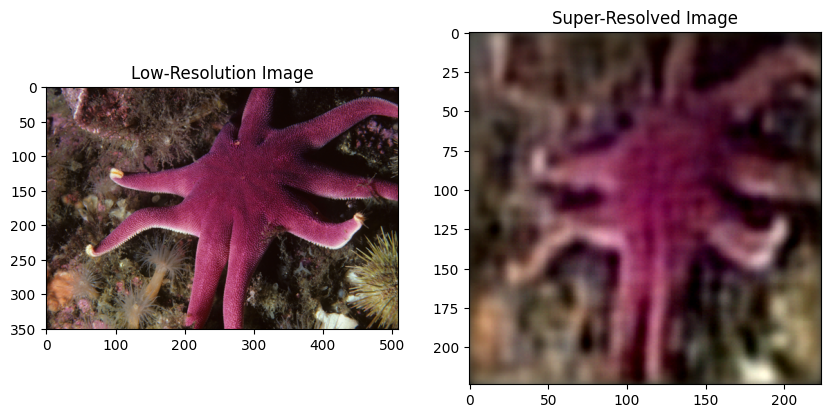

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import timm
from einops import rearrange
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

# ✅ Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# 🔹 1. Define the SwinIR Model
class SwinIR(nn.Module):
    def __init__(self, upscale_factor=4, embed_dim=768):
        super(SwinIR, self).__init__()
        self.encoder = timm.create_model("swin_tiny_patch4_window7_224", pretrained=False, num_classes=0)

        # Convert encoder output from 768 channels → 96
        self.conv1x1 = nn.Conv2d(embed_dim, 96, kernel_size=1)

        # Corrected Decoder: Upscales from (7×7) → (224×224)
        self.decoder = nn.Sequential(
            nn.Conv2d(96, 96 * 4, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),  # 7×7 → 14×14
            nn.Conv2d(96, 96 * 4, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),  # 14×14 → 28×28
            nn.Conv2d(96, 96 * 4, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),  # 28×28 → 56×56
            nn.Conv2d(96, 96 * 4, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),  # 56×56 → 112×112
            nn.Conv2d(96, 96 * 4, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),  # 112×112 → 224×224
            nn.Conv2d(96, 3, kernel_size=3, stride=1, padding=1)  # Output RGB image
        )

    def forward(self, x):
        b, c, h, w = x.shape

        # Ensure input size is 224x224
        if h != 224 or w != 224:
            raise ValueError(f"Input size must be (224, 224), but got ({h}, {w})")

        # Extract features using Swin Transformer
        x = self.encoder.forward_features(x)  # (b, 7, 7, 768)

        # Reshape for the decoder
        x = rearrange(x, 'b h w c -> b c h w')  # (b, 768, 7, 7)

        # Convert from 768 → 96 channels
        x = self.conv1x1(x)  # (b, 96, 7, 7)

        # Corrected decoder upscaling
        x = self.decoder(x)  # Final output: (b, 3, 224, 224)

        return torch.clamp(x, 0, 1)  # ✅ Clamp output to valid range


# 🔹 2. Define Custom Dataset
class SRDataset(Dataset):
    def __init__(self, lr_dir, hr_dir, transform=None):
        self.lr_images = sorted(os.listdir(lr_dir))
        self.hr_images = sorted(os.listdir(hr_dir))
        self.lr_dir = lr_dir
        self.hr_dir = hr_dir
        self.transform = transform

    def __len__(self):
        return len(self.lr_images)

    def __getitem__(self, idx):
        lr_img = Image.open(os.path.join(self.lr_dir, self.lr_images[idx])).convert("RGB")
        hr_img = Image.open(os.path.join(self.hr_dir, self.hr_images[idx])).convert("RGB")

        if self.transform:
            lr_img = self.transform(lr_img)
            hr_img = self.transform(hr_img)

        return lr_img, hr_img


# 🔹 3. Define Transforms (Bicubic Resizing for LR Images)
transform = transforms.Compose([
    transforms.Resize((224, 224), interpolation=Image.BICUBIC),
    transforms.ToTensor()
])

# ✅ Change these paths to your dataset directories
lr_path = "/content/DIV2K/DIV2K_train_LR_bicubic/X4/"
hr_path = "/content/DIV2K/DIV2K_train_HR/"

# 🔹 4. Prepare DataLoader
dataset = SRDataset(lr_path, hr_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=4, pin_memory=True)


# 🔹 5. Define Loss & Optimizer
model = SwinIR().to(device)
criterion = nn.MSELoss()  # Use L1Loss or MSELoss
optimizer = optim.Adam(model.parameters(), lr=5e-5)


# 🔹 6. Train the Model
def train(model, dataloader, criterion, optimizer, device, epochs=50):
    model.train()
    for epoch in range(epochs):
        epoch_loss = 0
        for batch_idx, (lr_img, hr_img) in enumerate(dataloader):
            lr_img, hr_img = lr_img.to(device), hr_img.to(device)

            # Forward pass
            sr_img = model(lr_img)
            loss = criterion(sr_img, hr_img)

            # Backpropagation
            optimizer.zero_grad()
            loss.backward()

            # Apply gradient clipping to prevent instability
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            optimizer.step()

            epoch_loss += loss.item()

            if batch_idx % 10 == 0:
                print(f"Epoch [{epoch+1}/{epochs}], Batch [{batch_idx+1}/{len(dataloader)}], Loss: {loss.item():.4f}")

        print(f"Epoch [{epoch+1}/{epochs}], Avg Loss: {epoch_loss / len(dataloader):.4f}")


# 🔹 7. Run Training
train(model, dataloader, criterion, optimizer, device, epochs=50)


# 🔹 8. Inference (Super-Resolution)
def super_resolve(model, image_path):
    model.eval()
    lr_image = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([
        transforms.Resize((224, 224), interpolation=Image.BICUBIC),
        transforms.ToTensor()
    ])
    lr_tensor = transform(lr_image).unsqueeze(0).to(device)

    with torch.no_grad():
        sr_tensor = model(lr_tensor)

    sr_image = sr_tensor.squeeze(0).cpu().permute(1, 2, 0).numpy()

    # ✅ Normalize for visualization
    sr_image = (sr_image - sr_image.min()) / (sr_image.max() - sr_image.min())

    # Display results
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(lr_image)
    axes[0].set_title("Low-Resolution Image")
    axes[1].imshow(sr_image)
    axes[1].set_title("Super-Resolved Image")
    plt.show()


# ✅ Test on a sample image
test_image_path = "/content/DIV2K/DIV2K_train_LR_bicubic/X4/0001x4.png"
super_resolve(model, test_image_path)


In [ ]:
import os
import gdown  # Google Drive downloader

# Create dataset directory
dataset_dir = "/content/DIV2K"
os.makedirs(dataset_dir, exist_ok=True)

# Download DIV2K HR images (Train)
hr_url = "https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip"
lr_url = "https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_bicubic_X4.zip"

# Download using gdown
!wget "$hr_url" -O "$dataset_dir/DIV2K_train_HR.zip"
!wget "$lr_url" -O "$dataset_dir/DIV2K_train_LR.zip"

# Unzip the datasets
!unzip "$dataset_dir/DIV2K_train_HR.zip" -d "$dataset_dir"
!unzip "$dataset_dir/DIV2K_train_LR.zip" -d "$dataset_dir"


--2025-04-06 17:55:51--  https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3530603713 (3.3G) [application/zip]
Saving to: ‘/content/DIV2K/DIV2K_train_HR.zip’

/content/DIV2K/DIV2 100%[===================>]   3.29G  22.2MB/s    in 2m 38s  

2025-04-06 17:58:30 (21.3 MB/s) - ‘/content/DIV2K/DIV2K_train_HR.zip’ saved [3530603713/3530603713]

--2025-04-06 17:58:30--  https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_bicubic_X4.zip
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 246914039 (235M) [application/zip]
Saving to: ‘/c

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [1/50], Batch [1/50], Loss: 0.2431
Epoch [1/50], Batch [11/50], Loss: 0.2181
Epoch [1/50], Batch [21/50], Loss: 0.1820
Epoch [1/50], Batch [31/50], Loss: 0.1333
Epoch [1/50], Batch [41/50], Loss: 0.0967
Epoch [1/50], Avg Loss: 0.1679
Epoch [2/50], Batch [1/50], Loss: 0.0868
Epoch [2/50], Batch [11/50], Loss: 0.0841
Epoch [2/50], Batch [21/50], Loss: 0.0729
Epoch [2/50], Batch [31/50], Loss: 0.0488
Epoch [2/50], Batch [41/50], Loss: 0.0433
Epoch [2/50], Avg Loss: 0.0654
Epoch [3/50], Batch [1/50], Loss: 0.0475
Epoch [3/50], Batch [11/50], Loss: 0.0398
Epoch [3/50], Batch [21/50], Loss: 0.0332
Epoch [3/50], Batch [31/50], Loss: 0.0390
Epoch [3/50], Batch [41/50], Loss: 0.0376
Epoch [3/50], Avg Loss: 0.0402
Epoch [4/50], Batch [1/50], Loss: 0.0432
Epoch [4/50], Batch [11/50], Loss: 0.0435
Epoch [4/50], Batch [21/50], Loss: 0.0353
Epoch [4/50], Batch [31/50], Loss: 0.0384
Epoch [4/50], Batch [41/50], Loss: 0.0309
Epoch [4/50], Avg Loss: 0.0353
Epoch [5/50], Batch [1/50], Loss: 0.0336

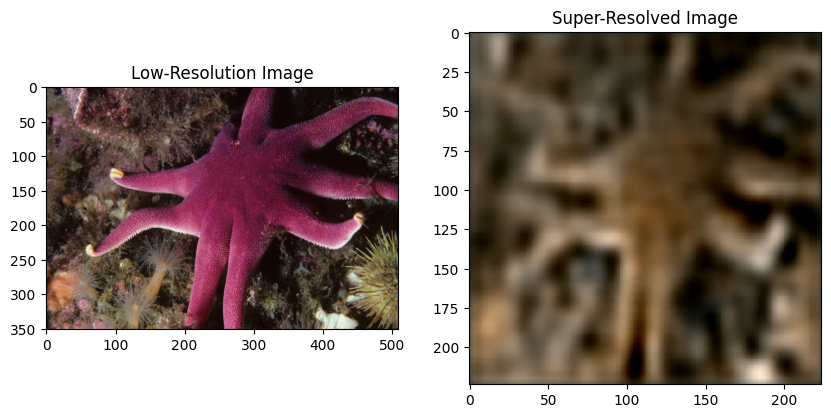

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import timm
from einops import rearrange
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

# ✅ Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 🔹 1. Define Low-Rank Convolution Layer
class LowRankConv(nn.Module):
    def __init__(self, in_channels, out_channels, rank=32):
        super(LowRankConv, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, rank, kernel_size=1, stride=1, padding=0)  # Reduce rank
        self.conv2 = nn.Conv2d(rank, out_channels, kernel_size=3, stride=1, padding=1)  # Expand back

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        return x


# 🔹 2. Define the SwinIR Model with Low-Rank Decomposition
class SwinIR_LowRank(nn.Module):
    def __init__(self, upscale_factor=4, embed_dim=768):
        super(SwinIR_LowRank, self).__init__()
        self.encoder = timm.create_model("swin_tiny_patch4_window7_224", pretrained=False, num_classes=0)

        self.conv1x1 = nn.Conv2d(embed_dim, 96, kernel_size=1)

        # ✅ Low-Rank Convolutions in Decoder
        self.decoder = nn.Sequential(
            LowRankConv(96, 96 * 4),
            nn.PixelShuffle(2),  # 7×7 → 14×14
            LowRankConv(96, 96 * 4),
            nn.PixelShuffle(2),  # 14×14 → 28×28
            LowRankConv(96, 96 * 4),
            nn.PixelShuffle(2),  # 28×28 → 56×56
            LowRankConv(96, 96 * 4),
            nn.PixelShuffle(2),  # 56×56 → 112×112
            LowRankConv(96, 96 * 4),
            nn.PixelShuffle(2),  # 112×112 → 224×224
            nn.Conv2d(96, 3, kernel_size=3, stride=1, padding=1)  # Output RGB image
        )

    def forward(self, x):
        b, c, h, w = x.shape
        if h != 224 or w != 224:
            raise ValueError(f"Input size must be (224, 224), but got ({h}, {w})")

        x = self.encoder.forward_features(x)
        x = rearrange(x, 'b h w c -> b c h w')
        x = self.conv1x1(x)
        x = self.decoder(x)
        return torch.clamp(x, 0, 1)


# 🔹 3. Define Custom Dataset
class SRDataset(Dataset):
    def __init__(self, lr_dir, hr_dir, transform=None):
        self.lr_images = sorted(os.listdir(lr_dir))
        self.hr_images = sorted(os.listdir(hr_dir))
        self.lr_dir = lr_dir
        self.hr_dir = hr_dir
        self.transform = transform

    def __len__(self):
        return len(self.lr_images)

    def __getitem__(self, idx):
        lr_img = Image.open(os.path.join(self.lr_dir, self.lr_images[idx])).convert("RGB")
        hr_img = Image.open(os.path.join(self.hr_dir, self.hr_images[idx])).convert("RGB")

        if self.transform:
            lr_img = self.transform(lr_img)
            hr_img = self.transform(hr_img)

        return lr_img, hr_img


# 🔹 4. Define Transforms (Bicubic Resizing for LR Images)
transform = transforms.Compose([
    transforms.Resize((224, 224), interpolation=Image.BICUBIC),
    transforms.ToTensor()
])

# ✅ Change these paths to your dataset directories
lr_path = "/content/DIV2K/DIV2K_train_LR_bicubic/X4/"
hr_path = "/content/DIV2K/DIV2K_train_HR/"

# 🔹 5. Prepare DataLoader
dataset = SRDataset(lr_path, hr_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=4, pin_memory=True)


# 🔹 6. Define Loss & Optimizer
model = SwinIR_LowRank().to(device)
criterion = nn.MSELoss()  # Use L1Loss or MSELoss
optimizer = optim.Adam(model.parameters(), lr=5e-5)


# 🔹 7. Train the Model
def train(model, dataloader, criterion, optimizer, device, epochs=50):
    model.train()
    for epoch in range(epochs):
        epoch_loss = 0
        for batch_idx, (lr_img, hr_img) in enumerate(dataloader):
            lr_img, hr_img = lr_img.to(device), hr_img.to(device)

            # Forward pass
            sr_img = model(lr_img)
            loss = criterion(sr_img, hr_img)

            # Backpropagation
            optimizer.zero_grad()
            loss.backward()

            # Apply gradient clipping to prevent instability
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            optimizer.step()

            epoch_loss += loss.item()

            if batch_idx % 10 == 0:
                print(f"Epoch [{epoch+1}/{epochs}], Batch [{batch_idx+1}/{len(dataloader)}], Loss: {loss.item():.4f}")

        print(f"Epoch [{epoch+1}/{epochs}], Avg Loss: {epoch_loss / len(dataloader):.4f}")


# 🔹 8. Run Training
train(model, dataloader, criterion, optimizer, device, epochs=50)


# 🔹 9. Inference (Super-Resolution)
def super_resolve(model, image_path):
    model.eval()
    lr_image = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([
        transforms.Resize((224, 224), interpolation=Image.BICUBIC),
        transforms.ToTensor()
    ])
    lr_tensor = transform(lr_image).unsqueeze(0).to(device)

    with torch.no_grad():
        sr_tensor = model(lr_tensor)

    sr_image = sr_tensor.squeeze(0).cpu().permute(1, 2, 0).numpy()

    # ✅ Normalize for visualization
    sr_image = (sr_image - sr_image.min()) / (sr_image.max() - sr_image.min())

    # Display results
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(lr_image)
    axes[0].set_title("Low-Resolution Image")
    axes[1].imshow(sr_image)
    axes[1].set_title("Super-Resolved Image")
    plt.show()


# ✅ Test on a sample image
test_image_path = "/content/DIV2K/DIV2K_train_LR_bicubic/X4/0001x4.png"
super_resolve(model, test_image_path)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import timm
from einops import rearrange
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

# ✅ Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# 🔹 1. Define the SwinIR Model
class SwinIR(nn.Module):
    def __init__(self, upscale_factor=4, embed_dim=768):
        super(SwinIR, self).__init__()
        self.encoder = timm.create_model("swin_tiny_patch4_window7_224", pretrained=False, num_classes=0)

        # Convert encoder output from 768 channels → 96
        self.conv1x1 = nn.Conv2d(embed_dim, 96, kernel_size=1)

        # Corrected Decoder: Upscales from (7×7) → (224×224)
        self.decoder = nn.Sequential(
            nn.Conv2d(96, 96 * 4, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),  # 7×7 → 14×14
            nn.Conv2d(96, 96 * 4, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),  # 14×14 → 28×28
            nn.Conv2d(96, 96 * 4, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),  # 28×28 → 56×56
            nn.Conv2d(96, 96 * 4, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),  # 56×56 → 112×112
            nn.Conv2d(96, 96 * 4, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),  # 112×112 → 224×224
            nn.Conv2d(96, 3, kernel_size=3, stride=1, padding=1)  # Output RGB image
        )

    def forward(self, x):
        b, c, h, w = x.shape

        # Ensure input size is 224x224
        if h != 224 or w != 224:
            raise ValueError(f"Input size must be (224, 224), but got ({h}, {w})")

        # Extract features using Swin Transformer
        x = self.encoder.forward_features(x)  # (b, 7, 7, 768)

        # Reshape for the decoder
        x = rearrange(x, 'b h w c -> b c h w')  # (b, 768, 7, 7)

        # Convert from 768 → 96 channels
        x = self.conv1x1(x)  # (b, 96, 7, 7)

        # Corrected decoder upscaling
        x = self.decoder(x)  # Final output: (b, 3, 224, 224)

        return torch.clamp(x, 0, 1)  # ✅ Clamp output to valid range


# 🔹 2. Define Custom Dataset
class SRDataset(Dataset):
    def __init__(self, lr_dir, hr_dir, transform=None):
        self.lr_images = sorted(os.listdir(lr_dir))
        self.hr_images = sorted(os.listdir(hr_dir))
        self.lr_dir = lr_dir
        self.hr_dir = hr_dir
        self.transform = transform

    def __len__(self):
        return len(self.lr_images)

    def __getitem__(self, idx):
        lr_img = Image.open(os.path.join(self.lr_dir, self.lr_images[idx])).convert("RGB")
        hr_img = Image.open(os.path.join(self.hr_dir, self.hr_images[idx])).convert("RGB")

        if self.transform:
            lr_img = self.transform(lr_img)
            hr_img = self.transform(hr_img)

        return lr_img, hr_img


# 🔹 3. Define Transforms (Bicubic Resizing for LR Images)
transform = transforms.Compose([
    transforms.Resize((224, 224), interpolation=Image.BICUBIC),
    transforms.ToTensor()
])

# ✅ Change these paths to your dataset directories
lr_path = "/content/DIV2K/DIV2K_train_LR_bicubic/X4/"
hr_path = "/content/DIV2K/DIV2K_train_HR/"

# 🔹 4. Prepare DataLoader
dataset = SRDataset(lr_path, hr_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=4, pin_memory=True)


# 🔹 5. Define Loss & Optimizer
model = SwinIR().to(device)
criterion = nn.MSELoss()  # Use L1Loss or MSELoss
optimizer = optim.Adam(model.parameters(), lr=5e-5)


# 🔹 6. Train the Model
def train(model, dataloader, criterion, optimizer, device, epochs=500):
    model.train()
    for epoch in range(epochs):
        epoch_loss = 0
        for batch_idx, (lr_img, hr_img) in enumerate(dataloader):
            lr_img, hr_img = lr_img.to(device), hr_img.to(device)

            # Forward pass
            sr_img = model(lr_img)
            loss = criterion(sr_img, hr_img)

            # Backpropagation
            optimizer.zero_grad()
            loss.backward()

            # Apply gradient clipping to prevent instability
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            optimizer.step()

            epoch_loss += loss.item()

            if batch_idx % 10 == 0:
                print(f"Epoch [{epoch+1}/{epochs}], Batch [{batch_idx+1}/{len(dataloader)}], Loss: {loss.item():.4f}")

        print(f"Epoch [{epoch+1}/{epochs}], Avg Loss: {epoch_loss / len(dataloader):.4f}")


# 🔹 7. Run Training
train(model, dataloader, criterion, optimizer, device, epochs=500)


# 🔹 8. Inference (Super-Resolution)
def super_resolve(model, image_path):
    model.eval()
    lr_image = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([
        transforms.Resize((224, 224), interpolation=Image.BICUBIC),
        transforms.ToTensor()
    ])
    lr_tensor = transform(lr_image).unsqueeze(0).to(device)

    with torch.no_grad():
        sr_tensor = model(lr_tensor)

    sr_image = sr_tensor.squeeze(0).cpu().permute(1, 2, 0).numpy()

    # ✅ Normalize for visualization
    sr_image = (sr_image - sr_image.min()) / (sr_image.max() - sr_image.min())

    # Display results
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(lr_image)
    axes[0].set_title("Low-Resolution Image")
    axes[1].imshow(sr_image)
    axes[1].set_title("Super-Resolved Image")
    plt.show()


# ✅ Test on a sample image
test_image_path = "/content/DIV2K/DIV2K_train_LR_bicubic/X4/0001x4.png"
super_resolve(model, test_image_path)

KeyboardInterrupt: 

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNe

Epoch [1/10], Batch [1/50], Loss: 0.2473
Epoch [1/10], Batch [11/50], Loss: 0.1616
Epoch [1/10], Batch [21/50], Loss: 0.1139
Epoch [1/10], Batch [31/50], Loss: 0.0720
Epoch [1/10], Batch [41/50], Loss: 0.0750
Epoch [1/10] Summary:
→ Avg Loss: 0.1179
→ Accuracy: 0.0013, Precision: 0.0000, Recall: 0.0013, F1-score: 0.0000


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [2/10], Batch [1/50], Loss: 0.0633
Epoch [2/10], Batch [11/50], Loss: 0.0513
Epoch [2/10], Batch [21/50], Loss: 0.0401
Epoch [2/10], Batch [31/50], Loss: 0.0412
Epoch [2/10], Batch [41/50], Loss: 0.0358
Epoch [2/10] Summary:
→ Avg Loss: 0.0447
→ Accuracy: 0.0037, Precision: 0.0000, Recall: 0.0037, F1-score: 0.0001


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [3/10], Batch [1/50], Loss: 0.0409
Epoch [3/10], Batch [11/50], Loss: 0.0313
Epoch [3/10], Batch [21/50], Loss: 0.0405
Epoch [3/10], Batch [31/50], Loss: 0.0319
Epoch [3/10], Batch [41/50], Loss: 0.0401
Epoch [3/10] Summary:
→ Avg Loss: 0.0363
→ Accuracy: 0.0037, Precision: 0.0000, Recall: 0.0037, F1-score: 0.0001


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [4/10], Batch [1/50], Loss: 0.0301
Epoch [4/10], Batch [11/50], Loss: 0.0320
Epoch [4/10], Batch [21/50], Loss: 0.0304
Epoch [4/10], Batch [31/50], Loss: 0.0360
Epoch [4/10], Batch [41/50], Loss: 0.0292
Epoch [4/10] Summary:
→ Avg Loss: 0.0324
→ Accuracy: 0.0050, Precision: 0.0000, Recall: 0.0050, F1-score: 0.0001


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [5/10], Batch [1/50], Loss: 0.0311
Epoch [5/10], Batch [11/50], Loss: 0.0331
Epoch [5/10], Batch [21/50], Loss: 0.0304
Epoch [5/10], Batch [31/50], Loss: 0.0265
Epoch [5/10], Batch [41/50], Loss: 0.0265
Epoch [5/10] Summary:
→ Avg Loss: 0.0299
→ Accuracy: 0.0063, Precision: 0.0002, Recall: 0.0063, F1-score: 0.0003


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [6/10], Batch [1/50], Loss: 0.0327
Epoch [6/10], Batch [11/50], Loss: 0.0277
Epoch [6/10], Batch [21/50], Loss: 0.0277
Epoch [6/10], Batch [31/50], Loss: 0.0258
Epoch [6/10], Batch [41/50], Loss: 0.0282
Epoch [6/10] Summary:
→ Avg Loss: 0.0282
→ Accuracy: 0.0050, Precision: 0.0001, Recall: 0.0050, F1-score: 0.0002


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [7/10], Batch [1/50], Loss: 0.0299
Epoch [7/10], Batch [11/50], Loss: 0.0277
Epoch [7/10], Batch [21/50], Loss: 0.0244
Epoch [7/10], Batch [31/50], Loss: 0.0180
Epoch [7/10], Batch [41/50], Loss: 0.0229
Epoch [7/10] Summary:
→ Avg Loss: 0.0234
→ Accuracy: 0.0063, Precision: 0.0003, Recall: 0.0063, F1-score: 0.0005


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [8/10], Batch [1/50], Loss: 0.0180
Epoch [8/10], Batch [11/50], Loss: 0.0229
Epoch [8/10], Batch [21/50], Loss: 0.0216
Epoch [8/10], Batch [31/50], Loss: 0.0190
Epoch [8/10], Batch [41/50], Loss: 0.0177
Epoch [8/10] Summary:
→ Avg Loss: 0.0210
→ Accuracy: 0.0063, Precision: 0.0009, Recall: 0.0063, F1-score: 0.0011


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [9/10], Batch [1/50], Loss: 0.0264
Epoch [9/10], Batch [11/50], Loss: 0.0201
Epoch [9/10], Batch [21/50], Loss: 0.0215
Epoch [9/10], Batch [31/50], Loss: 0.0224
Epoch [9/10], Batch [41/50], Loss: 0.0204
Epoch [9/10] Summary:
→ Avg Loss: 0.0196
→ Accuracy: 0.0050, Precision: 0.0001, Recall: 0.0050, F1-score: 0.0001


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [10/10], Batch [1/50], Loss: 0.0211
Epoch [10/10], Batch [11/50], Loss: 0.0176
Epoch [10/10], Batch [21/50], Loss: 0.0170
Epoch [10/10], Batch [31/50], Loss: 0.0203
Epoch [10/10], Batch [41/50], Loss: 0.0218
Epoch [10/10] Summary:
→ Avg Loss: 0.0189
→ Accuracy: 0.0075, Precision: 0.0038, Recall: 0.0075, F1-score: 0.0030


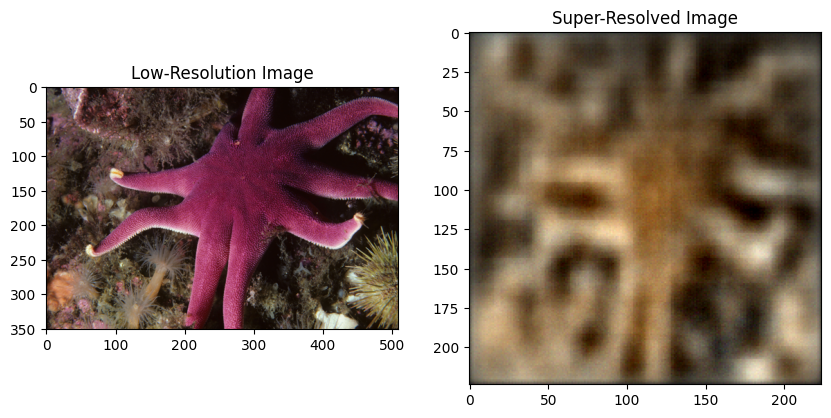

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import timm
from einops import rearrange
from torchvision import transforms, models
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

# ✅ Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# 🔹 1. Define the SwinIR Model
class SwinIR(nn.Module):
    def __init__(self, upscale_factor=4, embed_dim=768):
        super(SwinIR, self).__init__()
        self.encoder = timm.create_model("swin_tiny_patch4_window7_224", pretrained=False, num_classes=0)
        self.conv1x1 = nn.Conv2d(embed_dim, 96, kernel_size=1)
        self.decoder = nn.Sequential(
            nn.Conv2d(96, 96 * 4, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),  # 7×7 → 14×14
            nn.Conv2d(96, 96 * 4, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),  # 14×14 → 28×28
            nn.Conv2d(96, 96 * 4, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),  # 28×28 → 56×56
            nn.Conv2d(96, 96 * 4, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),  # 56×56 → 112×112
            nn.Conv2d(96, 96 * 4, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),  # 112×112 → 224×224
            nn.Conv2d(96, 3, kernel_size=3, stride=1, padding=1)  # Output RGB image
        )

    def forward(self, x):
        b, c, h, w = x.shape
        if h != 224 or w != 224:
            raise ValueError(f"Input size must be (224, 224), but got ({h}, {w})")
        x = self.encoder.forward_features(x)
        x = rearrange(x, 'b h w c -> b c h w')
        x = self.conv1x1(x)
        x = self.decoder(x)
        return torch.clamp(x, 0, 1)


# 🔹 2. Dataset Class
class SRDataset(Dataset):
    def __init__(self, lr_dir, hr_dir, transform=None):
        self.lr_images = sorted(os.listdir(lr_dir))
        self.hr_images = sorted(os.listdir(hr_dir))
        self.lr_dir = lr_dir
        self.hr_dir = hr_dir
        self.transform = transform

    def __len__(self):
        return len(self.lr_images)

    def __getitem__(self, idx):
        lr_img = Image.open(os.path.join(self.lr_dir, self.lr_images[idx])).convert("RGB")
        hr_img = Image.open(os.path.join(self.hr_dir, self.hr_images[idx])).convert("RGB")

        if self.transform:
            lr_img = self.transform(lr_img)
            hr_img = self.transform(hr_img)

        return lr_img, hr_img


# 🔹 3. Transforms
transform = transforms.Compose([
    transforms.Resize((224, 224), interpolation=Image.BICUBIC),
    transforms.ToTensor()
])

lr_path = "/content/DIV2K/DIV2K_train_LR_bicubic/X4/"
hr_path = "/content/DIV2K/DIV2K_train_HR/"

dataset = SRDataset(lr_path, hr_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=4, pin_memory=True)

# 🔹 4. Load pretrained classifier for evaluation
classifier = models.resnet18(pretrained=True).to(device)
classifier.eval()
softmax = nn.Softmax(dim=1)


# 🔹 5. SwinIR Setup
model = SwinIR().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=5e-5)


# 🔹 6. Training Function with Evaluation
def evaluate_metrics(preds, targets):
    preds = torch.argmax(preds, dim=1).cpu().numpy()
    targets = torch.argmax(targets, dim=1).cpu().numpy()

    accuracy = accuracy_score(targets, preds)
    precision = precision_score(targets, preds, average='weighted', zero_division=0)
    recall = recall_score(targets, preds, average='weighted', zero_division=0)
    f1 = f1_score(targets, preds, average='weighted', zero_division=0)

    return accuracy, precision, recall, f1


def train(model, dataloader, criterion, optimizer, device, epochs=10):
    model.train()
    for epoch in range(epochs):
        epoch_loss = 0
        all_preds, all_targets = [], []

        for batch_idx, (lr_img, hr_img) in enumerate(dataloader):
            lr_img, hr_img = lr_img.to(device), hr_img.to(device)

            # Forward pass
            sr_img = model(lr_img)
            loss = criterion(sr_img, hr_img)

            optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

            epoch_loss += loss.item()

            # 🔸 Evaluate Classification Metrics
            with torch.no_grad():
                pred_logits = classifier(sr_img)
                target_logits = classifier(hr_img)

                all_preds.append(pred_logits)
                all_targets.append(target_logits)

            if batch_idx % 10 == 0:
                print(f"Epoch [{epoch+1}/{epochs}], Batch [{batch_idx+1}/{len(dataloader)}], Loss: {loss.item():.4f}")

        # 🔸 Stack and Compute Metrics
        all_preds = torch.cat(all_preds)
        all_targets = torch.cat(all_targets)
        acc, prec, rec, f1 = evaluate_metrics(all_preds, all_targets)

        print(f"Epoch [{epoch+1}/{epochs}] Summary:")
        print(f"→ Avg Loss: {epoch_loss / len(dataloader):.4f}")
        print(f"→ Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-score: {f1:.4f}")


# 🔹 7. Start Training
train(model, dataloader, criterion, optimizer, device, epochs=10)


# 🔹 8. Inference
def super_resolve(model, image_path):
    model.eval()
    lr_image = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([
        transforms.Resize((224, 224), interpolation=Image.BICUBIC),
        transforms.ToTensor()
    ])
    lr_tensor = transform(lr_image).unsqueeze(0).to(device)

    with torch.no_grad():
        sr_tensor = model(lr_tensor)

    sr_image = sr_tensor.squeeze(0).cpu().permute(1, 2, 0).numpy()
    sr_image = (sr_image - sr_image.min()) / (sr_image.max() - sr_image.min())

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(lr_image)
    axes[0].set_title("Low-Resolution Image")
    axes[1].imshow(sr_image)
    axes[1].set_title("Super-Resolved Image")
    plt.show()


# ✅ Test Inference
test_image_path = "/content/DIV2K/DIV2K_train_LR_bicubic/X4/0001x4.png"
super_resolve(model, test_image_path)


Epoch [1/10] | Loss: 0.0949 | Accuracy: 0.6408 | Precision: 0.5201 | Recall: 0.3358 | F1: 0.3877


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [2/10] | Loss: 0.0397 | Accuracy: 0.7706 | Precision: 0.7518 | Recall: 0.6182 | F1: 0.6742


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [3/10] | Loss: 0.0312 | Accuracy: 0.8070 | Precision: 0.7912 | Recall: 0.6886 | F1: 0.7350


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [4/10] | Loss: 0.0282 | Accuracy: 0.8186 | Precision: 0.8039 | Recall: 0.7061 | F1: 0.7506


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [5/10] | Loss: 0.0259 | Accuracy: 0.8290 | Precision: 0.8185 | Recall: 0.7242 | F1: 0.7661


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [6/10] | Loss: 0.0240 | Accuracy: 0.8384 | Precision: 0.8247 | Recall: 0.7438 | F1: 0.7807


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [7/10] | Loss: 0.0223 | Accuracy: 0.8460 | Precision: 0.8329 | Recall: 0.7572 | F1: 0.7926


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [8/10] | Loss: 0.0213 | Accuracy: 0.8505 | Precision: 0.8375 | Recall: 0.7660 | F1: 0.7993


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [9/10] | Loss: 0.0208 | Accuracy: 0.8533 | Precision: 0.8399 | Recall: 0.7721 | F1: 0.8032


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [10/10] | Loss: 0.0200 | Accuracy: 0.8568 | Precision: 0.8447 | Recall: 0.7772 | F1: 0.8085


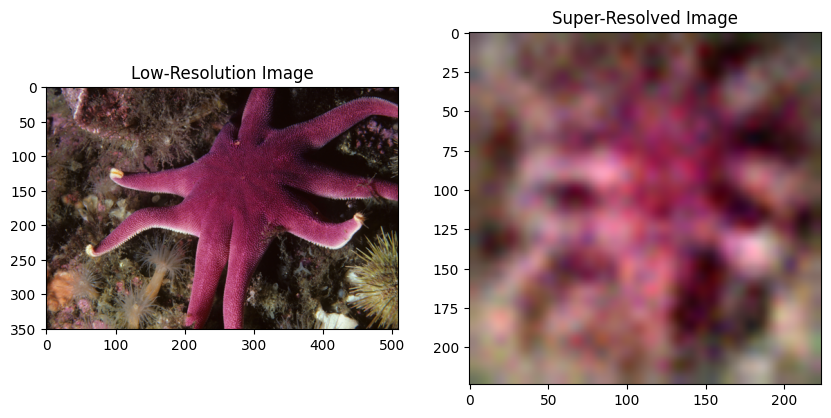

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import timm
from einops import rearrange
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ✅ Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 🔹 Multiscale Feature Extractor
class MultiScaleFeatureExtractor(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(MultiScaleFeatureExtractor, self).__init__()
        self.conv3 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(in_channels, out_channels, kernel_size=5, padding=2)
        self.relu = nn.ReLU(inplace=True)
        self.fusion = nn.Conv2d(out_channels * 2, out_channels, kernel_size=1)

    def forward(self, x):
        x3 = self.relu(self.conv3(x))
        x5 = self.relu(self.conv5(x))
        x_cat = torch.cat([x3, x5], dim=1)
        out = self.fusion(x_cat)
        return out

# 🔹 SwinIR with Multiscale Enhancement
class SwinIR(nn.Module):
    def __init__(self, upscale_factor=4, embed_dim=768):
        super(SwinIR, self).__init__()
        self.encoder = timm.create_model("swin_tiny_patch4_window7_224", pretrained=False, num_classes=0)
        self.conv1x1 = nn.Conv2d(embed_dim, 96, kernel_size=1)
        self.multiscale = MultiScaleFeatureExtractor(96, 96)
        self.decoder = nn.Sequential(
            nn.Conv2d(96, 96 * 4, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),
            nn.Conv2d(96, 96 * 4, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),
            nn.Conv2d(96, 3, kernel_size=3, stride=1, padding=1)
        )

    def forward(self, x):
        b, c, h, w = x.shape
        if h != 224 or w != 224:
            raise ValueError(f"Input size must be (224, 224), but got ({h}, {w})")
        x = self.encoder.forward_features(x)
        x = rearrange(x, 'b h w c -> b c h w')
        x = self.conv1x1(x)
        x = self.multiscale(x)
        x = self.decoder(x)
        return torch.clamp(x, 0, 1)

# 🔹 Dataset
class SRDataset(Dataset):
    def __init__(self, lr_dir, hr_dir, transform=None):
        self.lr_images = sorted(os.listdir(lr_dir))
        self.hr_images = sorted(os.listdir(hr_dir))
        self.lr_dir = lr_dir
        self.hr_dir = hr_dir
        self.transform = transform

    def __len__(self):
        return len(self.lr_images)

    def __getitem__(self, idx):
        lr_img = Image.open(os.path.join(self.lr_dir, self.lr_images[idx])).convert("RGB")
        hr_img = Image.open(os.path.join(self.hr_dir, self.hr_images[idx])).convert("RGB")
        if self.transform:
            lr_img = self.transform(lr_img)
            hr_img = self.transform(hr_img)
        return lr_img, hr_img

# 🔹 Transforms
transform = transforms.Compose([
    transforms.Resize((224, 224), interpolation=Image.BICUBIC),
    transforms.ToTensor()
])

lr_path = "/content/DIV2K/DIV2K_train_LR_bicubic/X4/"
hr_path = "/content/DIV2K/DIV2K_train_HR/"

# 🔹 Dataloader
dataset = SRDataset(lr_path, hr_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=4, pin_memory=True)

# 🔹 Model, Loss, Optimizer
model = SwinIR().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=5e-5)

# 🔹 Evaluation Function
def evaluate_metrics(sr_img, hr_img):
    sr = sr_img.detach().cpu().numpy().flatten()
    hr = hr_img.detach().cpu().numpy().flatten()
    sr_binary = (sr > 0.5).astype(int)
    hr_binary = (hr > 0.5).astype(int)
    acc = accuracy_score(hr_binary, sr_binary)
    prec = precision_score(hr_binary, sr_binary, zero_division=0)
    rec = recall_score(hr_binary, sr_binary, zero_division=0)
    f1 = f1_score(hr_binary, sr_binary, zero_division=0)
    return acc, prec, rec, f1

# 🔹 Training
def train(model, dataloader, criterion, optimizer, device, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        acc_total, prec_total, rec_total, f1_total = 0, 0, 0, 0
        for lr_img, hr_img in dataloader:
            lr_img, hr_img = lr_img.to(device), hr_img.to(device)
            sr_img = model(lr_img)

            # Resize output to match target
            sr_img_resized = torch.nn.functional.interpolate(sr_img, size=(224, 224), mode='bicubic', align_corners=False)

            loss = criterion(sr_img_resized, hr_img)
            optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            total_loss += loss.item()

            acc, prec, rec, f1 = evaluate_metrics(sr_img_resized, hr_img)
            acc_total += acc
            prec_total += prec
            rec_total += rec
            f1_total += f1

        N = len(dataloader)
        print(f"Epoch [{epoch+1}/{epochs}] | Loss: {total_loss/N:.4f} | Accuracy: {acc_total/N:.4f} | Precision: {prec_total/N:.4f} | Recall: {rec_total/N:.4f} | F1: {f1_total/N:.4f}")

# 🔹 Train
train(model, dataloader, criterion, optimizer, device, epochs=10)

# 🔹 Inference
def super_resolve(model, image_path):
    model.eval()
    lr_image = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([
        transforms.Resize((224, 224), interpolation=Image.BICUBIC),
        transforms.ToTensor()
    ])
    lr_tensor = transform(lr_image).unsqueeze(0).to(device)
    with torch.no_grad():
        sr_tensor = model(lr_tensor)
        sr_tensor_resized = torch.nn.functional.interpolate(sr_tensor, size=(224, 224), mode='bicubic', align_corners=False)
    sr_image = sr_tensor_resized.squeeze(0).cpu().permute(1, 2, 0).numpy()
    sr_image = (sr_image - sr_image.min()) / (sr_image.max() - sr_image.min())
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(lr_image)
    axes[0].set_title("Low-Resolution Image")
    axes[1].imshow(sr_image)
    axes[1].set_title("Super-Resolved Image")
    plt.show()

# 🔹 Run Inference on One Image
test_image_path = "/content/DIV2K/DIV2K_train_LR_bicubic/X4/0001x4.png"
super_resolve(model, test_image_path)

In [ ]:
import os
import gdown  # Google Drive downloader

# Create dataset directory
dataset_dir = "/content/DIV2K"
os.makedirs(dataset_dir, exist_ok=True)

# Download DIV2K HR images (Train)
hr_url = "https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip"
lr_url = "https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_bicubic_X4.zip"

# Download using gdown
!wget "$hr_url" -O "$dataset_dir/DIV2K_train_HR.zip"
!wget "$lr_url" -O "$dataset_dir/DIV2K_train_LR.zip"

# Unzip the datasets
!unzip "$dataset_dir/DIV2K_train_HR.zip" -d "$dataset_dir"
!unzip "$dataset_dir/DIV2K_train_LR.zip" -d "$dataset_dir"


--2025-05-02 05:23:53--  https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3530603713 (3.3G) [application/zip]
Saving to: ‘/content/DIV2K/DIV2K_train_HR.zip’

/content/DIV2K/DIV2 100%[===================>]   3.29G  20.7MB/s    in 2m 48s  

2025-05-02 05:26:42 (20.1 MB/s) - ‘/content/DIV2K/DIV2K_train_HR.zip’ saved [3530603713/3530603713]

--2025-05-02 05:26:42--  https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_bicubic_X4.zip
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 246914039 (235M) [application/zip]
Saving to: ‘/c

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [1/10] | Loss: 0.0732 | Accuracy: 0.6770 | Precision: 0.6110 | Recall: 0.4524 | F1: 0.5041


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [2/10] | Loss: 0.0315 | Accuracy: 0.8054 | Precision: 0.7898 | Recall: 0.6849 | F1: 0.7320


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [3/10] | Loss: 0.0259 | Accuracy: 0.8295 | Precision: 0.8160 | Recall: 0.7289 | F1: 0.7692


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [4/10] | Loss: 0.0227 | Accuracy: 0.8437 | Precision: 0.8291 | Recall: 0.7547 | F1: 0.7891


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [5/10] | Loss: 0.0207 | Accuracy: 0.8534 | Precision: 0.8403 | Recall: 0.7700 | F1: 0.8030


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [6/10] | Loss: 0.0192 | Accuracy: 0.8601 | Precision: 0.8467 | Recall: 0.7848 | F1: 0.8137


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [7/10] | Loss: 0.0179 | Accuracy: 0.8665 | Precision: 0.8534 | Recall: 0.7961 | F1: 0.8231


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [8/10] | Loss: 0.0170 | Accuracy: 0.8712 | Precision: 0.8580 | Recall: 0.8040 | F1: 0.8298


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [9/10] | Loss: 0.0164 | Accuracy: 0.8745 | Precision: 0.8614 | Recall: 0.8082 | F1: 0.8336


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [10/10] | Loss: 0.0157 | Accuracy: 0.8776 | Precision: 0.8632 | Recall: 0.8138 | F1: 0.8375


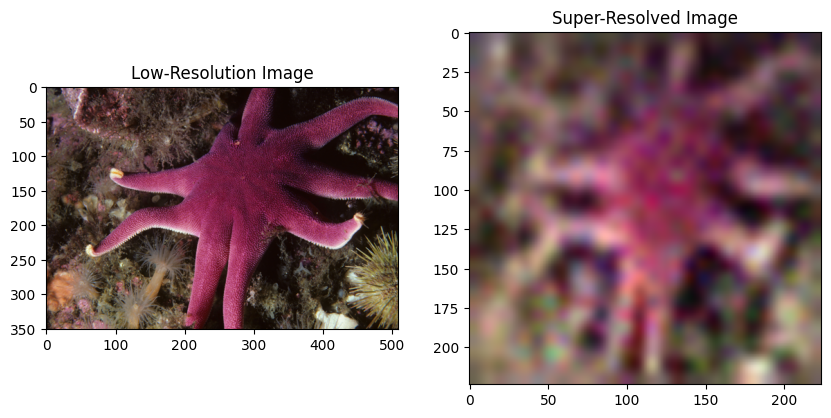

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import timm
from einops import rearrange
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ✅ Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 🔹 Multiscale Feature Extractor with Residual Addition
class MultiScaleFeatureExtractor(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(MultiScaleFeatureExtractor, self).__init__()
        self.conv3 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(in_channels, out_channels, kernel_size=5, padding=2)
        self.relu = nn.ReLU(inplace=True)
        self.fusion = nn.Conv2d(out_channels * 2, in_channels, kernel_size=1)
        self.res_scale = nn.Parameter(torch.tensor(1.0))  # Optional: Learnable scaling

    def forward(self, x):
        x3 = self.relu(self.conv3(x))
        x5 = self.relu(self.conv5(x))
        x_cat = torch.cat([x3, x5], dim=1)
        fused = self.fusion(x_cat)
        out = x + self.res_scale * fused  # Residual connection
        return out

# 🔹 SwinIR with Multiscale Enhancement
class SwinIR(nn.Module):
    def __init__(self, upscale_factor=4, embed_dim=768):
        super(SwinIR, self).__init__()
        self.encoder = timm.create_model("swin_tiny_patch4_window7_224", pretrained=False, num_classes=0)
        self.conv1x1 = nn.Conv2d(embed_dim, 96, kernel_size=1)
        self.multiscale = MultiScaleFeatureExtractor(96, 96)
        self.decoder = nn.Sequential(
            nn.Conv2d(96, 96 * 4, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),
            nn.Conv2d(96, 96 * 4, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),
            nn.Conv2d(96, 3, kernel_size=3, stride=1, padding=1)
        )

    def forward(self, x):
        b, c, h, w = x.shape
        if h != 224 or w != 224:
            raise ValueError(f"Input size must be (224, 224), but got ({h}, {w})")
        x = self.encoder.forward_features(x)
        x = rearrange(x, 'b h w c -> b c h w')
        x = self.conv1x1(x)
        x = self.multiscale(x)
        x = self.decoder(x)
        return torch.clamp(x, 0, 1)

# 🔹 Dataset
class SRDataset(Dataset):
    def __init__(self, lr_dir, hr_dir, transform=None):
        self.lr_images = sorted(os.listdir(lr_dir))
        self.hr_images = sorted(os.listdir(hr_dir))
        self.lr_dir = lr_dir
        self.hr_dir = hr_dir
        self.transform = transform

    def __len__(self):
        return len(self.lr_images)

    def __getitem__(self, idx):
        lr_img = Image.open(os.path.join(self.lr_dir, self.lr_images[idx])).convert("RGB")
        hr_img = Image.open(os.path.join(self.hr_dir, self.hr_images[idx])).convert("RGB")
        if self.transform:
            lr_img = self.transform(lr_img)
            hr_img = self.transform(hr_img)
        return lr_img, hr_img

# 🔹 Transforms
transform = transforms.Compose([
    transforms.Resize((224, 224), interpolation=Image.BICUBIC),
    transforms.ToTensor()
])

lr_path = "/content/DIV2K/DIV2K_train_LR_bicubic/X4/"
hr_path = "/content/DIV2K/DIV2K_train_HR/"

# 🔹 Dataloader
dataset = SRDataset(lr_path, hr_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=4, pin_memory=True)

# 🔹 Model, Loss, Optimizer
model = SwinIR().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=5e-5)

# 🔹 Evaluation Function
def evaluate_metrics(sr_img, hr_img):
    sr = sr_img.detach().cpu().numpy().flatten()
    hr = hr_img.detach().cpu().numpy().flatten()
    sr_binary = (sr > 0.5).astype(int)
    hr_binary = (hr > 0.5).astype(int)
    acc = accuracy_score(hr_binary, sr_binary)
    prec = precision_score(hr_binary, sr_binary, zero_division=0)
    rec = recall_score(hr_binary, sr_binary, zero_division=0)
    f1 = f1_score(hr_binary, sr_binary, zero_division=0)
    return acc, prec, rec, f1

# 🔹 Training
def train(model, dataloader, criterion, optimizer, device, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        acc_total, prec_total, rec_total, f1_total = 0, 0, 0, 0
        for lr_img, hr_img in dataloader:
            lr_img, hr_img = lr_img.to(device), hr_img.to(device)
            sr_img = model(lr_img)

            # Resize output to match target
            sr_img_resized = torch.nn.functional.interpolate(sr_img, size=(224, 224), mode='bicubic', align_corners=False)

            loss = criterion(sr_img_resized, hr_img)
            optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            total_loss += loss.item()

            acc, prec, rec, f1 = evaluate_metrics(sr_img_resized, hr_img)
            acc_total += acc
            prec_total += prec
            rec_total += rec
            f1_total += f1

        N = len(dataloader)
        print(f"Epoch [{epoch+1}/{epochs}] | Loss: {total_loss/N:.4f} | Accuracy: {acc_total/N:.4f} | Precision: {prec_total/N:.4f} | Recall: {rec_total/N:.4f} | F1: {f1_total/N:.4f}")

# 🔹 Train
train(model, dataloader, criterion, optimizer, device, epochs=10)

# 🔹 Inference
def super_resolve(model, image_path):
    model.eval()
    lr_image = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([
        transforms.Resize((224, 224), interpolation=Image.BICUBIC),
        transforms.ToTensor()
    ])
    lr_tensor = transform(lr_image).unsqueeze(0).to(device)
    with torch.no_grad():
        sr_tensor = model(lr_tensor)
        sr_tensor_resized = torch.nn.functional.interpolate(sr_tensor, size=(224, 224), mode='bicubic', align_corners=False)
    sr_image = sr_tensor_resized.squeeze(0).cpu().permute(1, 2, 0).numpy()
    sr_image = (sr_image - sr_image.min()) / (sr_image.max() - sr_image.min())
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(lr_image)
    axes[0].set_title("Low-Resolution Image")
    axes[1].imshow(sr_image)
    axes[1].set_title("Super-Resolved Image")
    plt.show()

# 🔹 Run Inference on One Image
test_image_path = "/content/DIV2K/DIV2K_train_LR_bicubic/X4/0001x4.png"
super_resolve(model, test_image_path)
